In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Data Science Projects/Food Delivery Cost and Profitability')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
food_orders = pd.read_csv('food_orders_new_delhi.csv')
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [ ]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [ ]:
food_orders = food_orders.dropna()

In [ ]:
food_orders.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.

In [ ]:
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

def extract_discount(discount_str):
    if 'off' in discount_str:
        return float(discount_str.split(' ')[0])

    elif '%' in discount_str:
        return float(discount_str.split('%')[0])

    else:
        return 0.0

food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage']/100) if x['Discount Percentage'] > 1 else x['Discount Percentage'], axis=1)
food_orders['Discount Amount'] = food_orders.apply(lambda x : x['Discount Amount'] if x['Discount Percentage']<=1 else x['Order Value']*x['Discount Percentage']/100, axis=1)
food_orders[['Order Value','Discounts and Offers','Discount Percentage','Discount Amount']].head()

<ipython-input-18-15953a587561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
<ipython-input-18-15953a587561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])
<ipython-input-18-15953a587561>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Order Value,Discounts and Offers,Discount Percentage,Discount Amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
4,1992,50 off Promo,50.0,996.00
5,439,10%,10.0,43.90


In [ ]:
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_profit = food_orders['Profit'].sum()
total_costs = food_orders['Total Costs'].sum()

overall_metrics = {
    'Total Orders': total_orders,
    'Total Revenue': total_revenue,
    'Total Costs': total_costs,
    'Total Profit': total_profit
}
print(overall_metrics)

{'Total Orders': 815, 'Total Revenue': 103798, 'Total Costs': 221741.84999999998, 'Total Profit': -117943.84999999998}


<ipython-input-22-3965e3f2f739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
<ipython-input-22-3965e3f2f739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_orders['Revenue'] = food_orders['Commission Fee']
<ipython-input-22-3965e3f2f739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Distribution of costs, revenue and profit

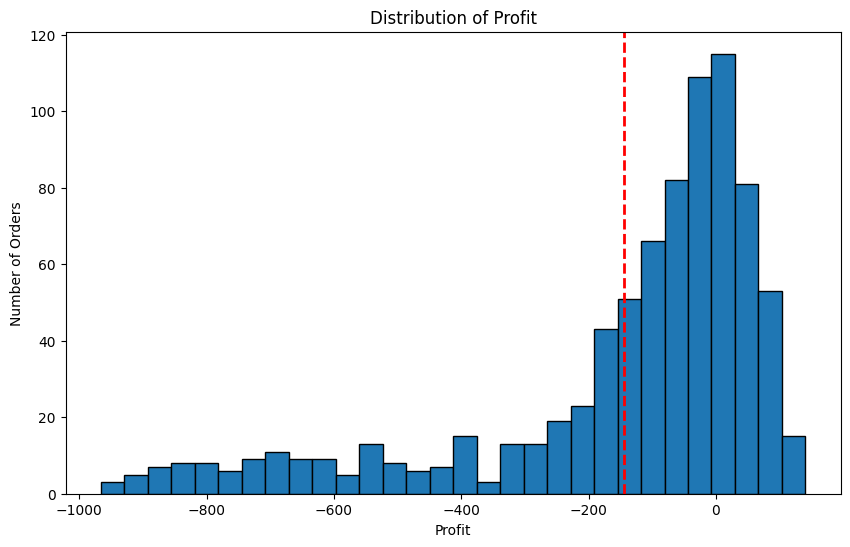

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'],bins=30,edgecolor = 'black')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(x=food_orders['Profit'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of Profit')
plt.show()

Proportion of total costs

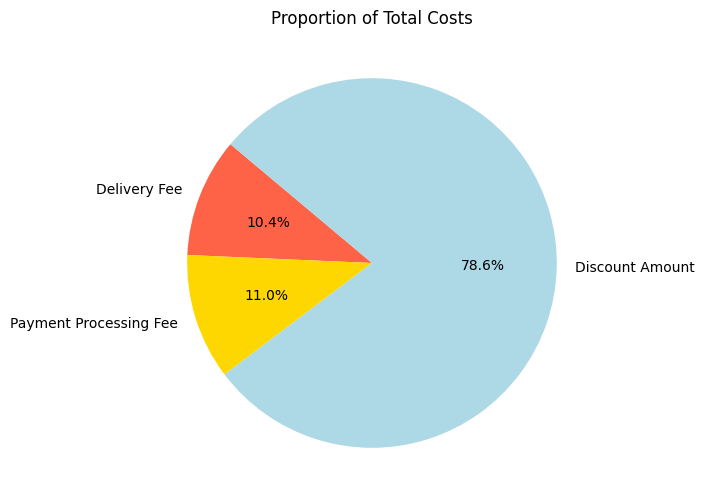

In [ ]:
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(8, 6))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors = ['tomato','gold','lightblue'])
plt.title('Proportion of Total Costs')
plt.show()

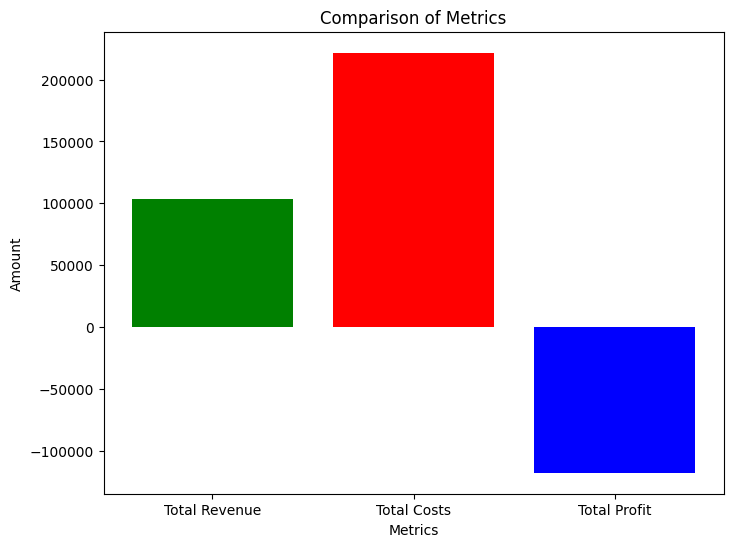

In [ ]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of Metrics')
plt.show()

#NEW Profitable Strategy

In [ ]:
profitable_orders = food_orders[food_orders['Profit'] > 0]

profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
profitable_orders['Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Discount Percentage'].mean()
print(new_avg_commission_percentage, new_avg_discount_percentage)

36.99030453177021 9.938775510204081


<ipython-input-28-44605d8fb1cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
<ipython-input-28-44605d8fb1cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


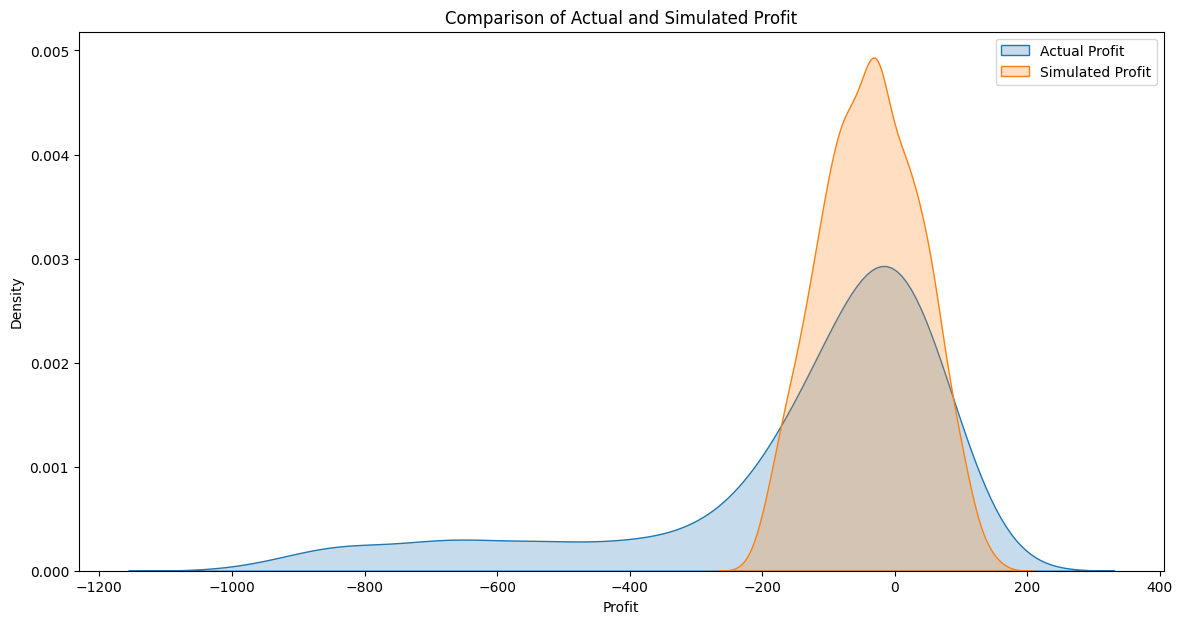

In [ ]:
recommended_commission_percentage = 37.0
recommended_discount_percentage = 10.0

food_orders['Simulated Commision Fee']  = food_orders['Order Value'] * recommended_commission_percentage / 100
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * recommended_discount_percentage / 100

food_orders['Simulated Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Simulated Discount Amount']
food_orders['Simulated Revenue'] = food_orders['Commission Fee']
food_orders['Simulated Profit'] = food_orders['Simulated Revenue'] - food_orders['Simulated Total Costs']

import seaborn as sns

plt.figure(figsize=(14,7))

sns.kdeplot(food_orders['Profit'],label="Actual Profit",fill=True)
sns.kdeplot(food_orders['Simulated Profit'],label="Simulated Profit",fill=True)

plt.xlabel('Profit')
plt.ylabel('Density')
plt.title('Comparison of Actual and Simulated Profit')
plt.legend()
plt.show()